<a href="https://colab.research.google.com/github/KevinWashington/SILLM_Atividade_1/blob/main/Atividade_1_Zscore_Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação do Ambiente

Atividade apresentada como parte da avaliação da disciplina Tópicos especiais: Introdução à Estatística e LLMs ministrada pelo professor Claudomiro de Souza de Sales Junior para o curso de Sistemas de Informação do Instituto de Ciências Exatas e Naturais da Universidade Federal do Pará - Campus Guamá.

Aluna: Kevin Washington Azevedo da Cruz 202211140006

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub
from scipy.stats import norm, binom, gamma

#Parte 1: Z-score e Binomial Distribution

## Seção A - Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados.

### Contextualização do dataset

O conjunto de dados da flor de Íris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936, O uso de múltiplas medições em problemas taxonômicos. Às vezes, é chamado de conjunto de dados Iris de Anderson porque Edgar Anderson coletou os dados para quantificar a variação morfológica das flores de Íris de três espécies relacionadas.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Íris (Iris Setosa, Iris virginica e Iris versicolor). Quatro características foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.

In [3]:
df = kagglehub.dataset_load(
  kagglehub.KaggleDatasetAdapter.PANDAS,
  "arshid/iris-flower-dataset",
  'IRIS.csv',
)

df.head()

100%|██████████| 4.51k/4.51k [00:00<00:00, 8.30MB/s]


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


| Nome da Coluna  | Descrição                                                                      |
|-----------------|--------------------------------------------------------------------------------|
| `sepal_length`  | Comprimento da sépala da flor, em centímetros.                                  |
| `sepal_width`   | Largura da sépala da flor, em centímetros.                                     |
| `petal_length`  | Comprimento da pétala da flor, em centímetros.                                  |
| `petal_width`   | Largura da pétala da flor, em centímetros.                                     |
| `species`       | Espécie da flor de Íris (Iris Setosa, Iris Virginica ou Iris Versicolor).     |

### Histogramas

Na elaboração dos histogramas, foram selecionadas as features 'petal_length' e 'sepal_width'. Para cada uma, utilizei dois conjuntos de bins com tamanhos de 15 e 5, respectivamente.

In [4]:
FEATURE_1 = 'petal_length'
FEATURE_2 = 'sepal_width'
CLASS_COLUMN = 'species'
classes = df[CLASS_COLUMN].unique()

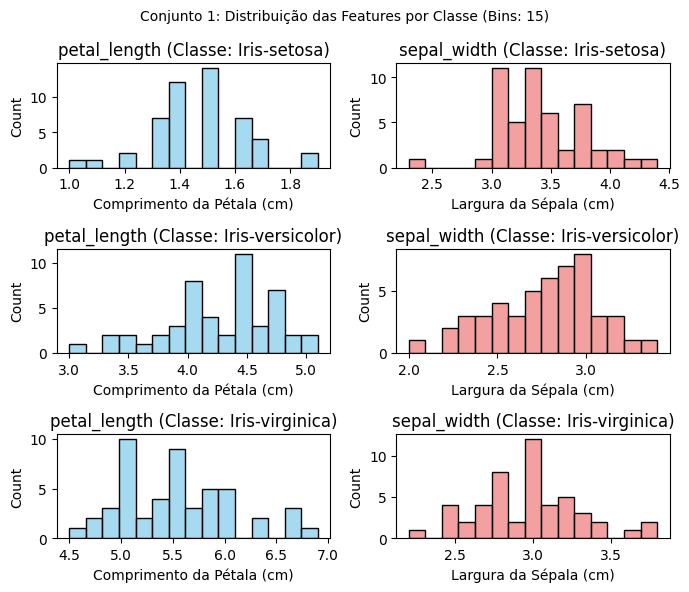

In [5]:
BINS_1 = 15

fig, axes = plt.subplots(nrows=len(classes), ncols=2, figsize=(7, 6))
fig.suptitle(f'Conjunto 1: Distribuição das Features por Classe (Bins: {BINS_1})', fontsize=10)

for i, class_name in enumerate(classes):
    df_class = df[df[CLASS_COLUMN] == class_name]

    # Feature 1: petal_length
    sns.histplot(df_class[FEATURE_1], bins=BINS_1, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{FEATURE_1} (Classe: {class_name})')
    axes[i, 0].set_xlabel('Comprimento da Pétala (cm)')

    # Feature 2: sepal_width
    sns.histplot(df_class[FEATURE_2], bins=BINS_1, ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'{FEATURE_2} (Classe: {class_name})')
    axes[i, 1].set_xlabel('Largura da Sépala (cm)')

plt.tight_layout()
plt.show()

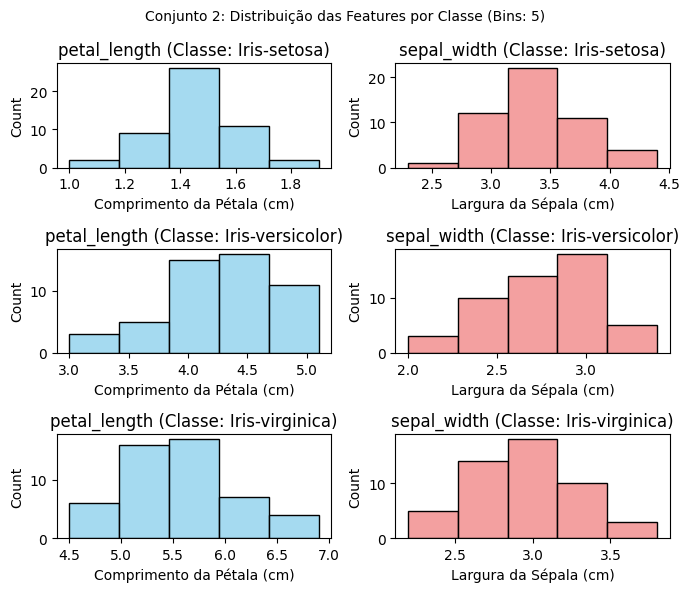

In [6]:
BINS_2 = 5

fig, axes = plt.subplots(nrows=len(classes), ncols=2, figsize=(7, 6))
fig.suptitle(f'Conjunto 2: Distribuição das Features por Classe (Bins: {BINS_2})', fontsize=10)

for i, class_name in enumerate(classes):
    df_class = df[df[CLASS_COLUMN] == class_name]

    # Feature 1: petal_length
    sns.histplot(df_class[FEATURE_1], bins=BINS_2, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{FEATURE_1} (Classe: {class_name})')
    axes[i, 0].set_xlabel('Comprimento da Pétala (cm)')

    # Feature 2: sepal_width
    sns.histplot(df_class[FEATURE_2], bins=BINS_2, ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'{FEATURE_2} (Classe: {class_name})')
    axes[i, 1].set_xlabel('Largura da Sépala (cm)')

plt.tight_layout()
plt.show()

### Discussão

Sobre a feature pental_length, a distribuição da Iris-setosa é quase perfeitamente separada das demais, sem sobreposição significativa. A sobreposição é maior entre Iris-versicolor e Iris-virginica. Logo a Iris-setosa seria classificada com quase 100% de precisão. A dificuldade estaria apenas em distinguir entre versicolor e virginica na zona de sobreposição.

As distribuições de todas as três classes se sobrepõem substancialmente. As médias das classes estão próximas e as caudas se misturam amplamente. Utilizar apenas esta feature tornaria a tarefa de classificação muito difícil.

Mesmo com BINS=5, a separabilidade das classes é evidente. A distribuição de petal_length da Iris-setosa se mantém isolada das demais classes, e a sobreposição entre versicolor e virginica continua sendo o principal desafio. Portanto, a conclusão de que petal_length é o melhor preditor não é alterada pela mudança nos bins.

##Seção B - Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada. Sempre considerando o contexto do seu primeiro trabalho.

### Contexto

A variável de interesse selecionada para este experimento é o `petal_length` (comprimento da pétala) especificamente da espécie `Iris-versicolor`. Foi escolhido este, pois o comprimento da pétala é uma das características mais distintivas entre as espécies de Íris, e focar na `Iris-versicolor` nos permitirá analisar a distribuição desta medida dentro de uma classe específica.

### Dados artificiais

Para realizar o cálculo do Z-score e simular a distribuição da variável de interesse, precisamos definir os parâmetros da população: a Média ($\mu$) e o Desvio Padrão ($\sigma$).Como estamos simulando um cenário realístico (baseado no petal_length da Iris-versicolor), utilizamos a Estimativa Pontual: assumimos que os parâmetros populacionais ($\mu$ e $\sigma$) são iguais às estatísticas amostrais ($\bar{x}$ e $s$).

Utilizamos a função np.random.normal() para gerar nossa população artificial de $10.000$ amostras, garantindo que elas sigam o modelo teórico da Distribuição Normal (Gaussiana) :

In [7]:
versicolor_petal_length = df[df['species'] == 'Iris-versicolor']['petal_length']
media_amostral = versicolor_petal_length.mean()
desvio_amostral = versicolor_petal_length.std()

MU = media_amostral
SIGMA = desvio_amostral
N_AMOSTRAS = 10000

dados_artificiais = np.random.normal(loc=MU, scale=SIGMA, size=N_AMOSTRAS)

O gráfico abaixo mostra o Histograma dos dados artificiais gerados, e a Curva da Distribuição Normal que teoricamente deveria aproximá-los.

A sobreposição demonstra que a simulação foi bem-sucedida e que os dados estão prontos para a análise do Z-score.

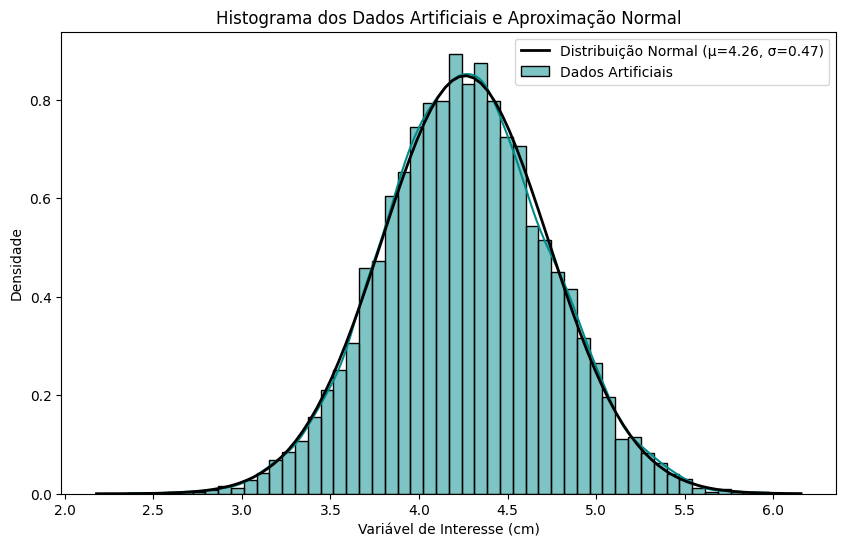

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(dados_artificiais, bins=50, kde=True, stat="density", color="darkcyan", label="Dados Artificiais")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, MU, SIGMA)
plt.plot(x, p, 'k', linewidth=2, label=f"Distribuição Normal (μ={MU:.2f}, σ={SIGMA:.2f})")

plt.title('Histograma dos Dados Artificiais e Aproximação Normal')
plt.xlabel('Variável de Interesse (cm)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

### Estudo de Probabilidade e Padronização (Z-score)

Definimos um evento de interesse para a nossa variável (Comprimento da Pétala) e calculamos a probabilidade de sua ocorrência.

* Evento de Interesse: Qual é a probabilidade de uma pétala ter um comprimento maior que $X_{corte}$ cm? (Ex: $P(X > 5.0)$).

A probabilidade é a área sob a Curva Normal à direita do valor de corte. Para calcular essa área, utilizamos dois métodos equivalentes:

####Cálculo A: Versão Não Padronizada

Usamos a função norm.cdf() com os parâmetros originais de $\mu$ e $\sigma$ para encontrar a probabilidade direta

In [9]:
VALOR_DE_CORTE = 5.0

prob_menor_ou_igual = norm.cdf(VALOR_DE_CORTE, loc=MU, scale=SIGMA)
prob_maior_que = 1 - prob_menor_ou_igual

print(f"Probabilidade P(X > {VALOR_DE_CORTE} cm) na versão Não Padronizada: {prob_maior_que:.4f}")

Probabilidade P(X > 5.0 cm) na versão Não Padronizada: 0.0577


####Cálculo B: Versão Padronizada

O valor de corte $X$ é transformado em $Z$:$$Z = \frac{X - \mu}{\sigma}$$

In [10]:
Z_score = (VALOR_DE_CORTE - MU) / SIGMA

print(f"O valor X = {VALOR_DE_CORTE} cm corresponde ao Z-score: {Z_score:.2f}")

O valor X = 5.0 cm corresponde ao Z-score: 1.57


A função norm.cdf() é usada com os parâmetros da Normal Padrão ($\mu=0, \sigma=1$) para obter a probabilidade de forma precisa e programática.

In [11]:
prob_menor_z = norm.cdf(Z_score, loc=0, scale=1)
prob_maior_z = 1 - prob_menor_z

print(f"Probabilidade P(Z > {Z_score:.2f}) na versão Padronizada (Z-score): {prob_maior_z:.4f}")

Probabilidade P(Z > 1.57) na versão Padronizada (Z-score): 0.0577


####Visualização da probabilidade

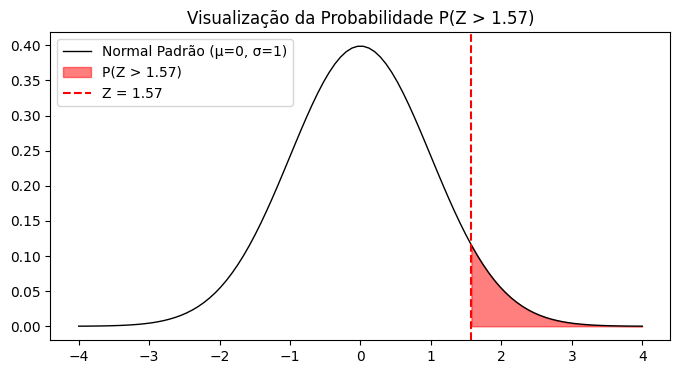

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
x_norm = np.linspace(-4, 4, 100)
ax.plot(x_norm, norm.pdf(x_norm, 0, 1), 'k-', lw=1, label='Normal Padrão (μ=0, σ=1)')

x_fill = np.linspace(Z_score, 4, 100)
ax.fill_between(x_fill, norm.pdf(x_fill, 0, 1), color='red', alpha=0.5, label=f'P(Z > {Z_score:.2f})')

ax.set_title('Visualização da Probabilidade P(Z > 1.57)')
ax.axvline(Z_score, color='red', linestyle='--', label=f'Z = {Z_score:.2f}')
ax.legend()
plt.show()

###Comparação entre função e tabela

Para comparar o resultado de probabilidade da funcão python (norm.cdf) com o resultado da tabela Z, irei primeiro arredondar o Z-score para 2 casas decimais (valor esperado na tabela)

In [13]:
Z_score_arredondado = round(Z_score, 2)

prob_menor_z = norm.cdf(Z_score_arredondado, loc=0, scale=1)
prob_maior_z = 1 - prob_menor_z

print(f"Probabilidade P(Z < {Z_score:.2f}) na versão Padronizada (Z-score): {prob_menor_z:.4f}")

Probabilidade P(Z < 1.57) na versão Padronizada (Z-score): 0.9418


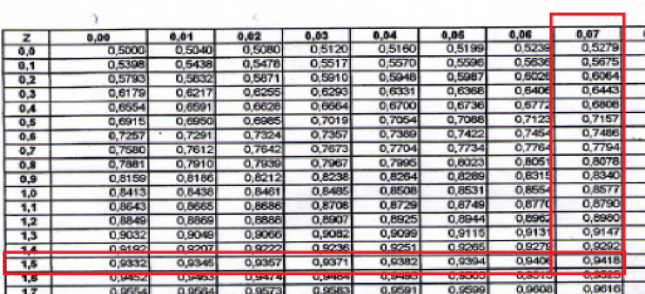

A equivalência dos resultados obtidos nos dois métodos comprova o poder de simplificação da padronização via Z-score, permitindo que qualquer problema de probabilidade Normal seja resolvido com uma única tabela.

##Seção C - Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

### Contexto


Esta seção replica o cenário de probabilidade Binomial apresentado no slide 13, substituindo a probabilidade de sucesso ($s$) de $0.95$ para o novo valor: $s=0.80$.

Assumimos os seguintes parâmetros para o cálculo da probabilidade de obter 48 sucessos ($x$) em 50 tentativas ($n$):
* Tentativas ($n$): 50
* Sucessos de Interesse ($x$): 48
* Prob. de Sucesso ($p=s$): $0.80$
* Prob. de Falha ($q=1-p$): $0.20$

###Calculo explicito da probabilidade

Primeiro a formula da equação:
$$P_{x}=\binom{n}{x}p^{x}q^{n-x}$$

preenchida:

$$P_{x}=\binom{50}{48}\times (0.80)^{48} \times (0.20)^{50-48}$$

resolução:

$$P_{48} = 1225 \times (0.80)^{48} \times (0.20)^{2}$$

$$P_{48} = 0,001092$$

In [14]:
n = 50
x = 48

p_80 = 0.80
prob_80 = binom.pmf(x, n, p_80)

print(f"Cenário (s=0.80):   Probabilidade  = {prob_80:.6f}")

Cenário (s=0.80):   Probabilidade  = 0.001093


Vemos então que o resultado do cálculo é o mesmo do retornado pela função para s=0.8

####Comparação de Resultados

O resultado de $\mathbf{0.109\%}$ (para $s=0.80$) é comparado com o $\mathbf{26.1\%}$ do slide (para $s=0.95$). A diferença demonstra o quão menos provável é obter um resultado tão alto ($48$ sucessos) quando a chance de falha aumenta, movendo o evento para a cauda da distribuição.

###Histograma das Primeiras Amostras (n=10, s=0.80)

Para ilustrar a variabilidade da amostragem, simulamos 10 rodadas de um experimento Binomial, onde cada rodada teve $n=10$ tentativas e probabilidade de sucesso $p=0.80$.

O histograma abaixo mostra a frequência do número de sucessos (entre 0 e 10) obtidos nessas 10 simulações, conforme o exemplo dos slides.


Resultados das 10 Amostras (n=10, s=0.95): [ 9 10 10 10  9 10 10 10 10 10]


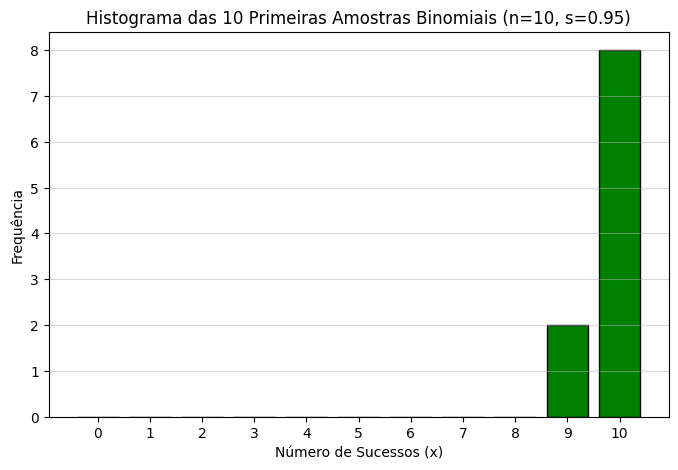

In [15]:
n_amostra = 10
p_sim = 0.95
n_simulacoes = 10

resultados_simulacao = binom.rvs(n=n_amostra, p=p_sim, size=n_simulacoes)

print(f"\nResultados das 10 Amostras (n={n_amostra}, s={p_sim}): {resultados_simulacao}")

plt.figure(figsize=(8, 5))
plt.hist(resultados_simulacao, bins=np.arange(n_amostra + 2) - 0.5,
         rwidth=0.8, color='green', edgecolor='black')

plt.xticks(np.arange(n_amostra + 1))
plt.title(f'Histograma das 10 Primeiras Amostras Binomiais (n=10, s={p_sim})')
plt.xlabel('Número de Sucessos (x)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.5)
plt.show()

#Parte 2: Sample distribution and sampling distribution, TLC, p-value

##Seção A - A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

###Criação da População Artificial

Utilizaremos a mesma variável de interesse e parâmetros ($\mu$, $\sigma$) definidos na Parte 1, Seção B, para criar uma população grande (e Gaussiana) que será nossa "verdade" populacional.

* $\mu$ = 4.26
* $\sigma$ = 0.47

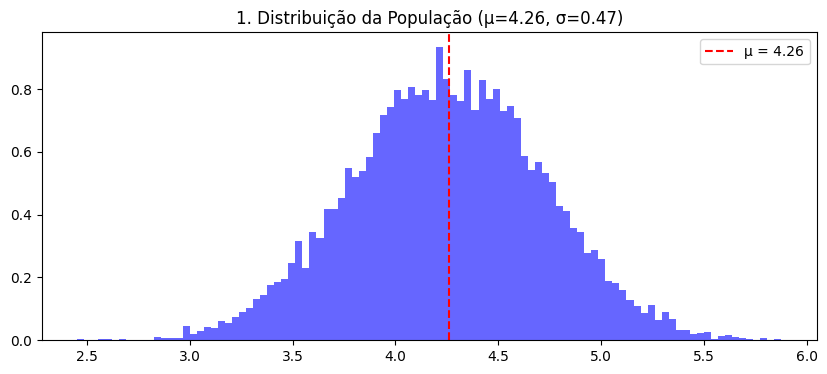

In [46]:
populacao = np.random.normal(loc=MU, scale=SIGMA, size=N_AMOSTRAS)

plt.figure(figsize=(10, 4))

plt.axvline(MU, color='r', linestyle='--', label=f'μ = {MU}')
plt.hist(populacao, bins=100, density=True, alpha=0.6, color='blue')
plt.title(f'1. Distribuição da População (μ={MU}, σ={SIGMA:.2f})')


plt.legend()
plt.show()

###Demonstração da Distribuição Amostral

Extraímos uma única amostra de tamanho $n$ da população para ilustrar a Distribuição Amostral.

In [27]:
SAMPLE_SIZE = 20

amostra_individual = np.random.choice(populacao, size=SAMPLE_SIZE, replace=False)

media_amostra_x = amostra_individual.mean()
std_amostra_s = amostra_individual.std()

print(f"Média Amostral (x̄): {media_amostra_x:.3f}")
print(f"Desvio Padrão Amostral (s): {std_amostra_s:.3f}")

Média Amostral (x̄): 4.126
Desvio Padrão Amostral (s): 0.456


###Demonstração da Distribuição de Amostragem

Extraímos muitas amostras (neste caso serão 10.000) e calculamos a média de cada uma. O histograma dessas médias forma a Distribuição de Amostragem.

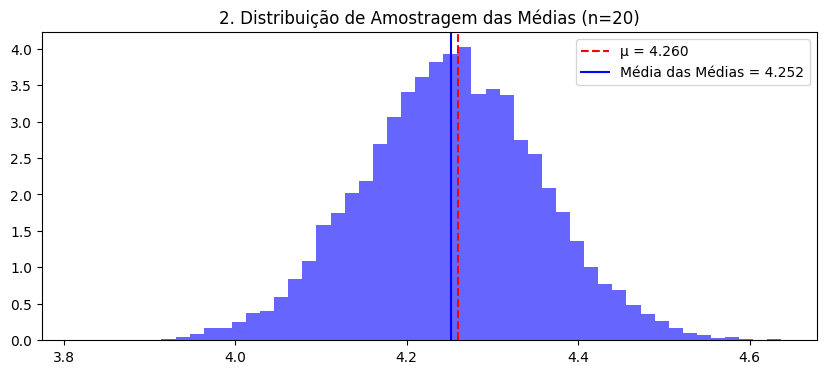


Estatísticas da Distribuição de Amostragem:
Média Populacional (μ): 4.260
Média das Médias (μx̄): 4.252 (Deve ser ≈ μ)
Erro Padrão Simulado (σx̄): 0.104
Erro Padrão Teórico: 0.105 (Deve ser ≈ Simulado)


In [75]:
N_AMOSTRAS_REPETIDAS = 10000

medias_amostrais = [np.random.choice(populacao, size=SAMPLE_SIZE).mean()
                    for _ in range(N_AMOSTRAS_REPETIDAS)]

media_das_medias = np.mean(medias_amostrais)
erro_padrao_simulado = np.std(medias_amostrais)
erro_padrao_teorico = SIGMA / np.sqrt(SAMPLE_SIZE)

plt.figure(figsize=(10, 4))
plt.hist(medias_amostrais, bins=50, density=True, alpha=0.6, color='blue')
plt.title(f'2. Distribuição de Amostragem das Médias (n={SAMPLE_SIZE})')
plt.axvline(MU, color='r', linestyle='--', label=f'μ = {MU:.3f}')
plt.axvline(media_das_medias, color='b', linestyle='-', label=f'Média das Médias = {media_das_medias:.3f}')

plt.legend()
plt.show()

print(f"\nEstatísticas da Distribuição de Amostragem:")
print(f"Média Populacional (μ): {MU:.3f}")
print(f"Média das Médias (μx̄): {media_das_medias:.3f} (Deve ser ≈ μ)")
print(f"Erro Padrão Simulado (σx̄): {erro_padrao_simulado:.3f}")
print(f"Erro Padrão Teórico: {erro_padrao_teorico:.3f} (Deve ser ≈ Simulado)")

###Avaliações de Probabilidade

Agora, podemos usar a Distribuição de Amostragem para calcular a probabilidade de obter uma média amostral específica.

####Estudo

* Qual é a probabilidade de obter uma média amostral $\bar{x} > 4.5$ cm, se o tamanho da amostra for $n=20$?

Cálculo do Z-score da Média ($\bar{x}$):

$$Z_{\bar{x}} = \frac{\bar{x} - \mu}{\sigma_{\bar{x}}}$$

Onde $\mu = 4.26$ e $\sigma_{\bar{x}} = \text{Erro Padrão Teórico} \approx 0.105$.

In [22]:
VALOR_DE_CORTE_XBAR = 4.5
Z_XBAR = (VALOR_DE_CORTE_XBAR - MU) / erro_padrao_teorico

prob_xbar_menor = norm.cdf(Z_XBAR, loc=0, scale=1)
prob_xbar_maior = 1 - prob_xbar_menor

print(f"\n--- Avaliação de Probabilidade ---")
print(f"Z-score da Média (X̄ = {VALOR_DE_CORTE_XBAR}): {Z_XBAR:.2f}")
print(f"Probabilidade P(X̄ > {VALOR_DE_CORTE_XBAR} cm): {prob_xbar_maior:.4f}")


--- Avaliação de Probabilidade ---
Z-score da Média (X̄ = 4.5): 2.28
Probabilidade P(X̄ > 4.5 cm): 0.0112


##Seção B - Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

###Criação e Visualização da População Gamma

Primeiro, definimos e visualizamos a distribuição original, que deve ser assimétrica e não-normal.

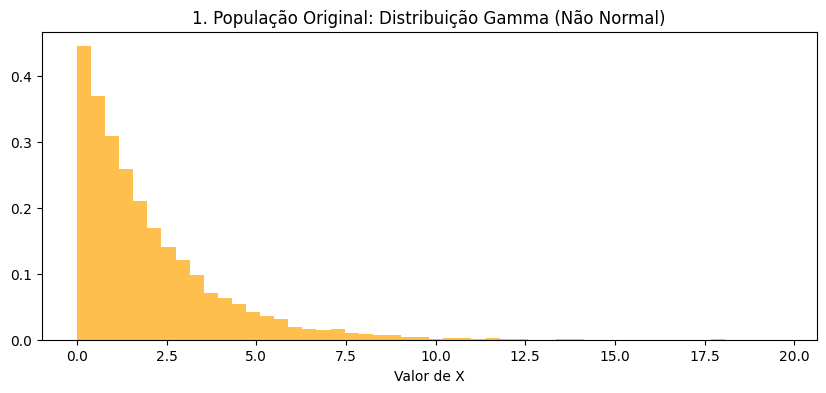

In [64]:
SHAPE = 1
SCALE = 2

populacao_gamma = gamma.rvs(a=SHAPE, scale=SCALE, size=10000)

plt.figure(figsize=(10, 4))
plt.hist(populacao_gamma, bins=50, density=True, alpha=0.7, color='orange')
plt.title('1. População Original: Distribuição Gamma (Não Normal)')
plt.xlabel('Valor de X')
plt.show()

###Simulações de amostras

Em seguida, simulamos a coleta de $10.000$ amostras, calculando a média de cada uma, para quatro tamanhos de amostra ($n$) diferentes: 10, 30, 60 e 100.

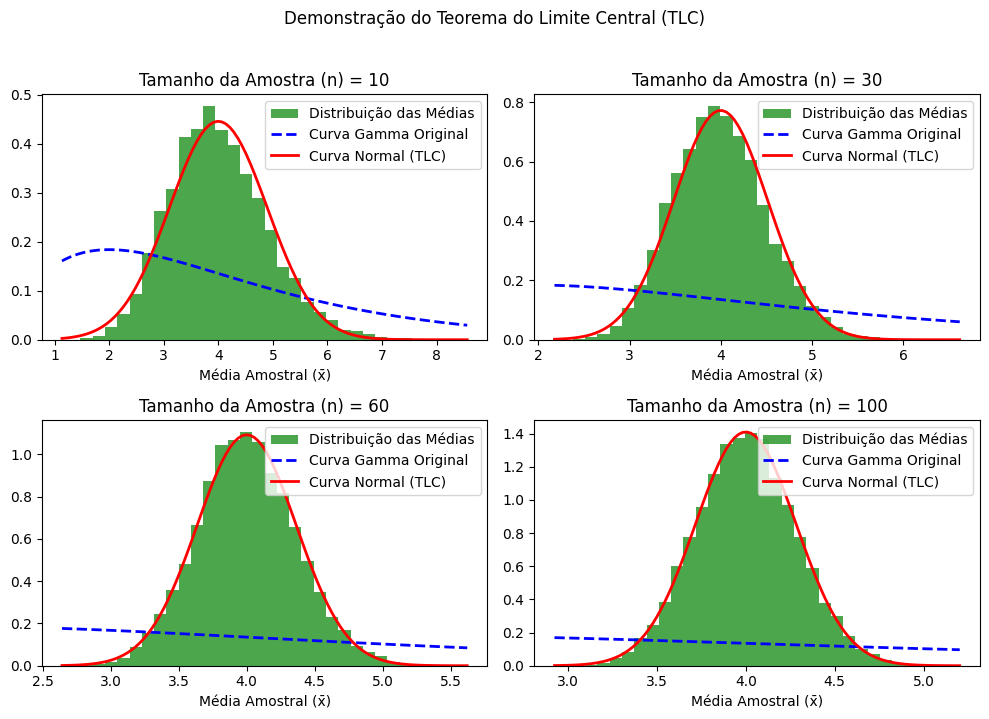

In [74]:
SHAPE = 2
SCALE = 2
N_AMOSTRAS_REPETIDAS = 10000
tamanhos_amostra = [10, 30, 60, 100]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.suptitle('Demonstração do Teorema do Limite Central (TLC)', fontsize=12, y=1.02)
axes = axes.flatten()

mu_pop = SHAPE * SCALE
sigma_pop = np.sqrt(mu_pop * SCALE)

for i, n in enumerate(tamanhos_amostra):
    medias_gamma = [gamma.rvs(a=SHAPE, scale=SCALE, size=n).mean()
                    for _ in range(N_AMOSTRAS_REPETIDAS)]

    ax = axes[i]
    ax.hist(medias_gamma, bins=30, density=True, alpha=0.7, color='green', label='Distribuição das Médias')
    ax.set_title(f'Tamanho da Amostra (n) = {n}')
    ax.set_xlabel('Média Amostral (x̄)')

    xmin, xmax = ax.get_xlim()
    x_range = np.linspace(xmin, xmax, 100)
    p_gamma = gamma.pdf(x_range, a=SHAPE, scale=SCALE)
    ax.plot(x_range, p_gamma, 'b--', linewidth=2, label='Curva Gamma Original')

    erro_padrao = sigma_pop / np.sqrt(n)
    p_normal = norm.pdf(x_range, mu_pop, erro_padrao)
    ax.plot(x_range, p_normal, 'r', linewidth=2, label='Curva Normal (TLC)')

    ax.legend()

plt.tight_layout()
plt.show()

###Análise da Convergência do TLC

| Tamanho da Amostra ($\boldsymbol{n}$) | Forma do Histograma| Conclusão do TLC |
| :---: | :--- | :--- |
| **10** | Apresenta assimetria visível e um formato ligeiramente inclinado, ainda refletindo a forma original da Distribuição Gamma. | A convergência para a Normal ainda é incipiente. |
| **30** | O histograma adquire uma forma simétrica e de sino (Gaussiana). A Curva Normal Teórica se alinha bem com as barras. | O **limite de corte** do TLC é atingido. A Distribuição de Amostragem é robustamente Normal. |
| **60** | Demonstra uma aproximação quase perfeita da Curva Normal. A dispersão (Erro Padrão) é visivelmente menor do que para $n=30$. | Aumentar $n$ reduz o Erro Padrão, provando que a média amostral se torna um **estimador mais preciso** da média populacional. |
| **100** | Apresenta uma forma ideal, quase indistinguível da Curva Normal Teórica. A distribuição é muito estreita. | A convergência é completa. A média amostral é altamente confiável. |

##Seção C - Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo (4 caras, 1 coroa). Coloque figuras para cada passo.


###Contexto

Testamos se uma moeda é honesta. Observamos o evento: 4 Caras em 5 lançamentos.

Pergunta: Essa ocorrência é rara o suficiente para rejeitar a ideia de que a moeda é honesta?

H0: A moeda é honesta. ($p = 0.5$)


### Parametros da aproximação

Primeiro calculamos sua média ($\mu$) e desvio padrão ($\sigma$).

Média ($\mu$): $\mu = n \cdot p = 5 \times 0.5 = 2.5$ Caras

Desvio Padrão ($\sigma$): $\sigma = \sqrt{n \cdot p \cdot q} = \sqrt{5 \times 0.5 \times 0.5} \approx 1.118$

In [85]:
MU_0 = 2.5
SIGMA = 1.118
X_OBSERVADO = 4

Gerei um histograma para visualizamos a distribuição e onde seria feito o corte do p-value.

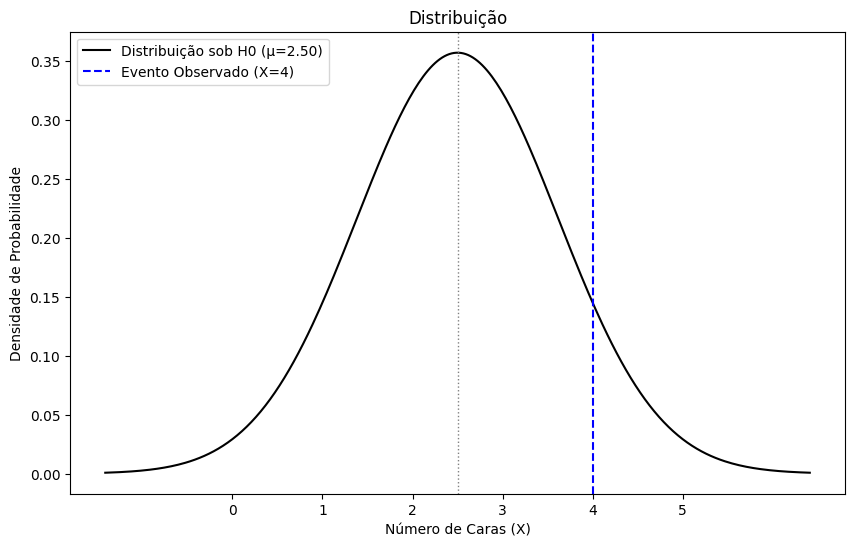

In [110]:
plt.figure(figsize=(10, 6))
x_range = np.linspace(MU_0 - 3.5*SIGMA, MU_0 + 3.5*SIGMA, 300)

pdf = norm.pdf(x_range, loc=MU_0, scale=SIGMA)
plt.plot(x_range, pdf, 'k', linewidth=1.5, label=f'Distribuição sob H0 (μ={MU_0:.2f})')

plt.axvline(X_OBSERVADO, color='blue', linestyle='--', linewidth=1.5, label=f'Evento Observado (X={X_OBSERVADO})')
plt.axvline(MU_0, color='gray', linestyle=':', linewidth=1)

plt.title('Distribuição')
plt.xlabel('Número de Caras (X)')
plt.ylabel('Densidade de Probabilidade')
plt.xticks(np.arange(6))
plt.legend()
plt.show()

###Cálculo do Z-score do Teste

Padronizamos o evento observado ($X=4$ Caras) para o Z-score, que indica o quão longe $X$ está da média ($\mu=2.5$) em unidades de desvio padrão.

In [86]:
Z_score = (X_OBSERVADO - MU_0) / SIGMA
print(f"Z-SCORE: {Z_score:.2f}")

Z-SCORE: 1.34


###Cálculo do p-value

Encontramos a probabilidade de obter 4 ou 5 Caras ($P(Z \ge 1.34)$) e multiplicamos por 2.

$$p\text{-value} = 2 \times P(Z \ge Z_{\text{score}})$$

In [89]:
prob_cauda_superior = 1 - norm.cdf(Z_score)
p_value = 2 * prob_cauda_superior

print(f"P-VALUE: {p_value:.4f}")

P-VALUE: 0.1797


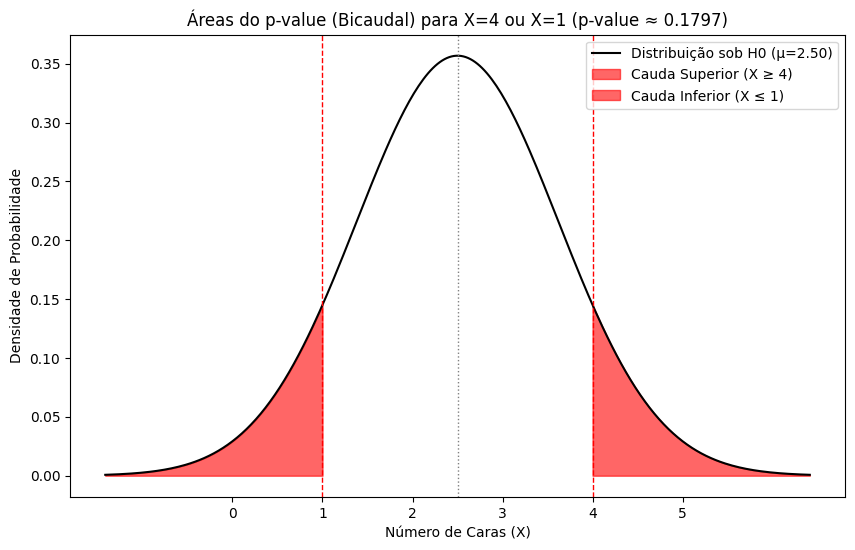

In [111]:
plt.figure(figsize=(10, 6))
x_range = np.linspace(MU_0 - 3.5*SIGMA, MU_0 + 3.5*SIGMA, 300)

pdf = norm.pdf(x_range, loc=MU_0, scale=SIGMA)
plt.plot(x_range, pdf, 'k', linewidth=1.5, label=f'Distribuição sob H0 (μ={MU_0:.2f})')

x_fill_sup = np.linspace(4, MU_0 + 3.5*SIGMA, 100)
y_fill_sup = norm.pdf(x_fill_sup, loc=MU_0, scale=SIGMA)
plt.fill_between(x_fill_sup, 0, y_fill_sup, color='red', alpha=0.6,
                 label=f'Cauda Superior (X ≥ {4})')
plt.axvline(4, color='r', linestyle='--', linewidth=1)

x_fill_inf = np.linspace(MU_0 - 3.5*SIGMA, 1, 100)
y_fill_inf = norm.pdf(x_fill_inf, loc=MU_0, scale=SIGMA)
plt.fill_between(x_fill_inf, 0, y_fill_inf, color='red', alpha=0.6,
                 label=f'Cauda Inferior (X ≤ {1})')
plt.axvline(1, color='r', linestyle='--', linewidth=1)

plt.axvline(MU_0, color='gray', linestyle=':', linewidth=1)

plt.title(f'Áreas do p-value (Bicaudal) para X=4 ou X=1 (p-value ≈ {p_value:.4f})')
plt.xlabel('Número de Caras (X)')
plt.ylabel('Densidade de Probabilidade')
plt.xticks(np.arange(6))
plt.legend()
plt.show()

###Conclusão

O p-value de $17.86\%$ é muito maior que $5\%$. Concluímos que 4 Caras em 5 lançamentos é um evento bastante comum para uma moeda honesta, e não temos evidência para afirmar que ela é viciada.

Logo não rejeitamos H0.

##Seção D - Crie duas Gaussianas como mostrado abaixo (é só variar a média). Sortei 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).


###Contexto e variaveis

Definimos duas distribuições para simular a situação onde a Hipótese Nula ($H_0$) é falsa, mas o teste pode falhar em detectá-lo:

Distribuição Vermelha ($H_0$): A hipótese testada (Nula). Assumimos $\mu_0 = 50$.

Distribuição Azul ($H_1$): A situação real (Alternativa e verdadeira). Assumimos $\mu_1 = 55$.

Tamanho da Amostra: $n=3$

Nível de Significância: $\alpha = 0.05$.

O risco de Falso Negativo é alto, pois a diferença entre $\mu_0=50$ e $\mu_1=55$ é pequena e o tamanho da amostra ($n=3$) é minúsculo, resultando em um Erro Padrão grande.

In [113]:
MU_0 = 50
MU_1 = 55
SIGMA = 5
N_AMOSTRA = 3
N_SIMULACOES = 100
ALPHA = 0.05

ERRO_PADRAO = SIGMA / np.sqrt(N_AMOSTRA)

###Plotagem das duas gaussianas

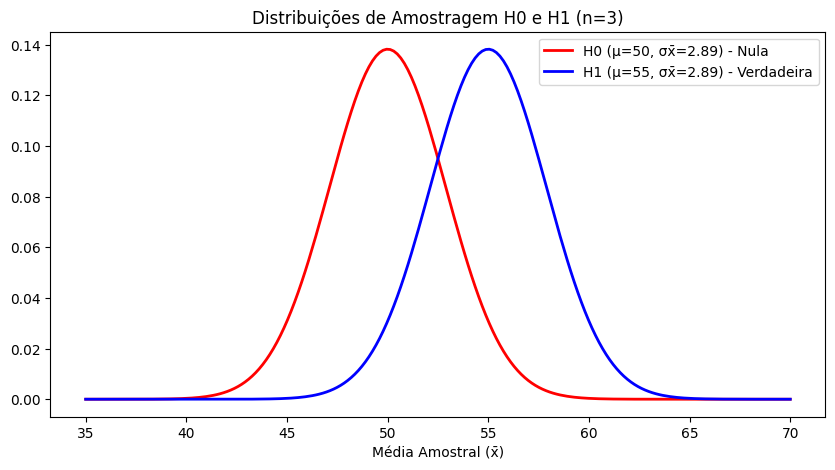

In [115]:
x = np.linspace(MU_0 - 15, MU_1 + 15, 200)

plt.figure(figsize=(10, 5))
plt.plot(x, norm.pdf(x, MU_0, ERRO_PADRAO), 'r', lw=2, label=f'H0 (μ={MU_0}, σx̄={ERRO_PADRAO:.2f}) - Nula')
plt.plot(x, norm.pdf(x, MU_1, ERRO_PADRAO), 'b', lw=2, label=f'H1 (μ={MU_1}, σx̄={ERRO_PADRAO:.2f}) - Verdadeira')
plt.title('Distribuições de Amostragem H0 e H1 (n=3)')
plt.xlabel('Média Amostral (x̄)')
plt.legend()
plt.show()


### Simulações e cálculo do falso negativo

In [122]:
falsos_negativos = 0
todos_p_values = []

amostras_h1_valores = norm.rvs(loc=MU_1, scale=SIGMA, size=(N_SIMULACOES, N_AMOSTRA))

for amostra in amostras_h1_valores:
    media_amostra = np.mean(amostra)
    Z_score = (media_amostra - MU_0) / ERRO_PADRAO
    p_value = 1 - norm.cdf(Z_score)

    todos_p_values.append(p_value)
    if p_value > ALPHA:
        falsos_negativos += 1

### Cálculo da Taxa Final

In [123]:
taxa_falso_negativo = (falsos_negativos / N_SIMULACOES) * 100

print(f"\n--- Simulação de Falso Negativo ---")
print(f"Erro Padrão da Média (σx̄): {ERRO_PADRAO:.3f}")
print(f"Média Observada da Amostra H1: {np.mean(amostras_h1_valores):.2f}")
print(f"Amostras que falharam em rejeitar H0 (Falsos Negativos): {falsos_negativos}")
print(f"Taxa de Falsos Negativos: {taxa_falso_negativo:.2f}%")


--- Simulação de Falso Negativo ---
Erro Padrão da Média (σx̄): 2.887
Média Observada da Amostra H1: 55.00
Amostras que falharam em rejeitar H0 (Falsos Negativos): 49
Taxa de Falsos Negativos (Erro Tipo II, β): 49.00%


### Visualização dos p-value

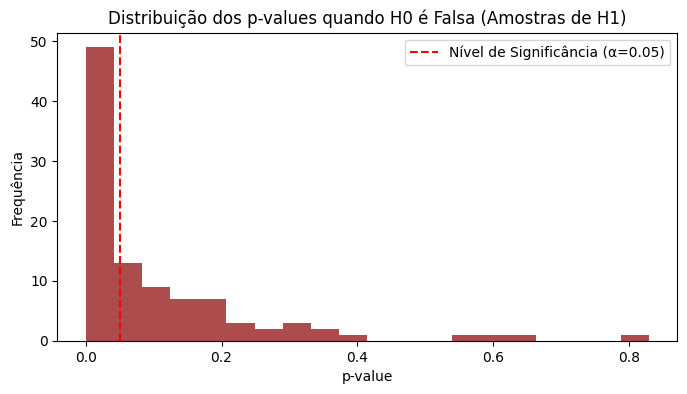

In [125]:
plt.figure(figsize=(8, 4))
plt.hist(todos_p_values, bins=20, color='darkred', alpha=0.7)
plt.axvline(ALPHA, color='r', linestyle='--', label=f'Nível de Significância (α={ALPHA})')
plt.title('Distribuição dos p-values quando H0 é Falsa (Amostras de H1)')
plt.xlabel('p-value')
plt.ylabel('Frequência')
plt.legend()
plt.show()